# Sprint18 データ作成

## 【問題1】自作データセットでの分類の学習
---
自作のデータセットに対して分類問題を解いてください。任意の実装を使用してください。
例えば、分類問題はKerasチュートリアルにあるCNN等でベースモデルラインを作成しても良いですし、これまでの課題で作成したモデルでも構いません。

In [397]:
import numpy  as np
import os
import glob 
import re
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [398]:
!dir

 ドライブ C のボリューム ラベルは OS です
 ボリューム シリアル番号は 5499-63A8 です

 C:\Users\Kaneko\diveintocode-ml\Sprint18 のディレクトリ

2021/09/07  10:32    <DIR>          .
2021/09/07  10:32    <DIR>          ..
2021/09/06  19:58    <DIR>          .ipynb_checkpoints
2021/09/07  03:55    <DIR>          img
2021/09/07  03:20    <DIR>          labelImg-master
2021/09/07  03:20         6,594,979 labelImg-master.zip
2021/09/05  15:18         1,149,597 MEF_Sprint18_make_dataset（受講生用）.ipynb
2021/09/07  10:32         4,514,048 sprint18_create_dataset.ipynb
2021/09/06  22:26    <DIR>          training
               3 個のファイル          12,258,624 バイト
               6 個のディレクトリ  362,223,026,176 バイトの空き領域


In [399]:
train_cats_dir = os.path.join(train_dir, 'cats')  # 学習用の猫画像のディレクトリ
train_dogs_dir = os.path.join(train_dir, 'dogs')  # 学習用の犬画像のディレクトリ

num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

total_train = num_cats_tr + num_dogs_tr

print("total_train: ", total_train)

total_train:  10


In [400]:
# テンソルを0〜255の値から0〜1の値にリスケーリング
train_image_generator = ImageDataGenerator(rescale=1./255) # 学習データのジェネレータ

batch_size = 2
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')


Found 10 images belonging to 2 classes.


In [401]:
sample_training_images, _ = next(train_data_gen)
print(sample_training_images.shape)

(2, 150, 150, 3)


In [402]:
# この関数は、1行5列のグリッド形式で画像をプロットし、画像は各列に配置されます。
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 2, figsize=(5,5))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()



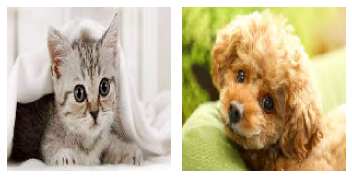

In [403]:
plotImages(sample_training_images[:2])

## イメージのロード、配列化、リサイズ、データセット作成
---

In [404]:
# np.resizeはだめ、ぜったい

dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        
        dog_img_ = Image.open(img)
        
        # サイズを揃える
        dog_img_ = dog_img_.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img_)
        
        # 正規化
        dog_img = dog_img / 255.
        
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
        
        dog_img_.close()
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img_ = Image.open(img)
        
        cat_img_ = cat_img_.resize((224, 224))
        
        cat_img = np.array(cat_img_)
        
        cat_img = cat_img / 255.
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)
        
        cat_img_.close()
        
print('dog_image:{}  cat_image:{}'.format(dog_img_array.shape, cat_img_array.shape))

dog_image:(0, 224, 224, 3)  cat_image:(0, 224, 224, 3)


## Kerasでモデルの構築

In [405]:
# CNNモデルの構築 
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [406]:
# モデルをコンパイル
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [407]:
# モデルのアーキテクチャを表示
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
flatten_17 (Flatten)         (None, 73984)             0         
_________________________________________________________________
dense_34 (Dense)             (None, 64)              

In [408]:
# 学習する
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs
#     validation_data=val_data_gen,
#     validation_steps=total_val // batch_size
)

Epoch 1/15


C:\Users\Kaneko\AppData\Roaming\Python\Python37\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


5/5 [==============================] - 1s 29ms/step - loss: 1.0661 - accuracy: 0.4000
Epoch 2/15
5/5 [==============================] - 0s 27ms/step - loss: 0.6834 - accuracy: 0.4000
Epoch 3/15
5/5 [==============================] - 0s 27ms/step - loss: 0.5347 - accuracy: 0.8000
Epoch 4/15
5/5 [==============================] - 0s 26ms/step - loss: 0.2255 - accuracy: 1.0000
Epoch 5/15
5/5 [==============================] - 0s 25ms/step - loss: 0.2061 - accuracy: 0.9000
Epoch 6/15
5/5 [==============================] - 0s 25ms/step - loss: 0.1053 - accuracy: 1.0000
Epoch 7/15
5/5 [==============================] - 0s 28ms/step - loss: 0.0379 - accuracy: 1.0000
Epoch 8/15
5/5 [==============================] - 0s 30ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 9/15
5/5 [==============================] - 0s 27ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 10/15
5/5 [==============================] - 0s 27ms/step - loss: 3.1608e-04 - accuracy: 1.0000
Epoch 11/15
5/5 [===================

## 【問題2】分類データセットに対するデータ拡張
---
集めた画像をデータ拡張（Data Augmentation）してください。
画像を反転させたり、色を変えたり、クロッピング（一部だけ切り出す）などをしましょう。
また、下記にデータ拡張のためのライブラリがありますので、参考になりましたら幸いです。

In [436]:
import albumentations as A
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [437]:
img_cats_list = os.listdir(train_cats_dir)
img_dogs_list = os.listdir(train_dogs_dir)
img_cats_list, img_dogs_list

(['cat.12.jpg', 'cat.30.jpg', 'cat.48.jpg', 'cat.64.jpg', 'cat.78.jpg'],
 ['dog.27.jpg', 'dog.31.jpg', 'dog.45.jpg', 'dog.8.jpg', 'dog.83.jpg'])

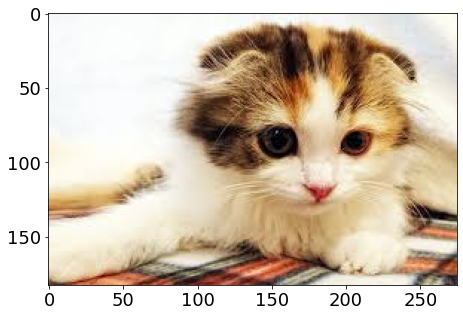

In [438]:
image = cv2.imread(train_cats_dir + '\\' + img_cats_list[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 5))
plt.imshow(image)

In [439]:
def transform_image_plot(img_path, transform, trans_title=""):
    orig_img = cv2.imread(img_path)
    orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

    # Augment an image
    transformed = transform(image=orig_img)
    trans_img = transformed["image"]
 
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    plt.subplots_adjust(wspace=0)
    plt.rcParams["font.size"] = 18
    

    ax[0].set_title("Original")
    ax[1].set_title(trans_title)

    ax[0].imshow(orig_img)
    ax[1].imshow(trans_img)


## 反転

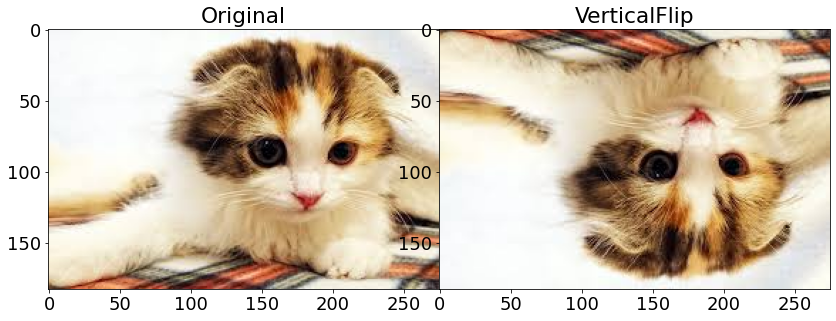

In [440]:
transform = A.Compose([
    A.VerticalFlip(p=1.0)
])
transform_image_plot(train_cats_dir + '\\' + img_cats_list[0], transform, trans_title="VerticalFlip")

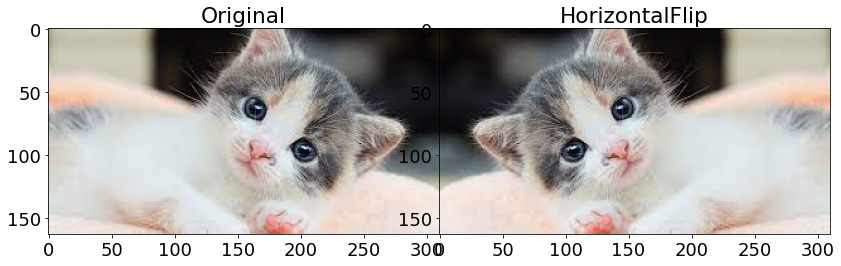

In [441]:
transform = A.Compose([
    A.HorizontalFlip(p=1.0)
])
transform_image_plot(train_cats_dir + '\\' + img_cats_list[1], transform, trans_title="HorizontalFlip")

## Crop

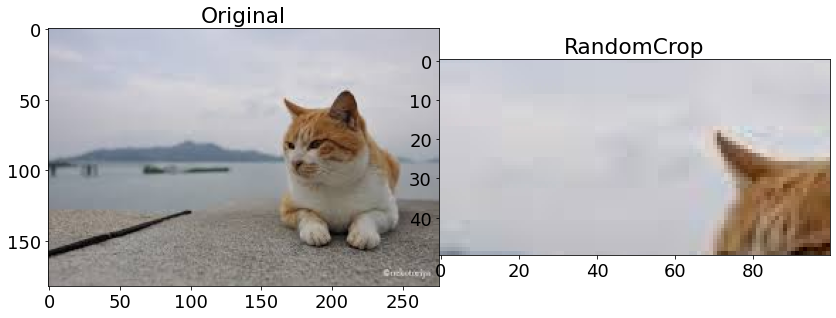

In [442]:
transform = A.Compose([
    A.RandomCrop(height=50, width=100, p=1)
])
transform_image_plot(train_cats_dir + '\\' + img_cats_list[2], transform, trans_title="RandomCrop")

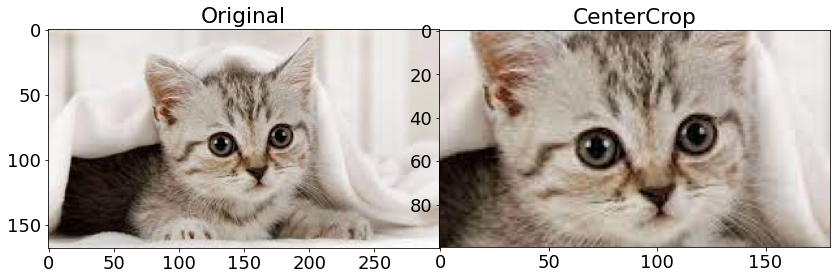

In [443]:
transform = A.Compose([
    A.CenterCrop(height=100, width=180, p=1)
])
transform_image_plot(train_cats_dir + '\\' + img_cats_list[3], transform, trans_title="CenterCrop")

## Blur

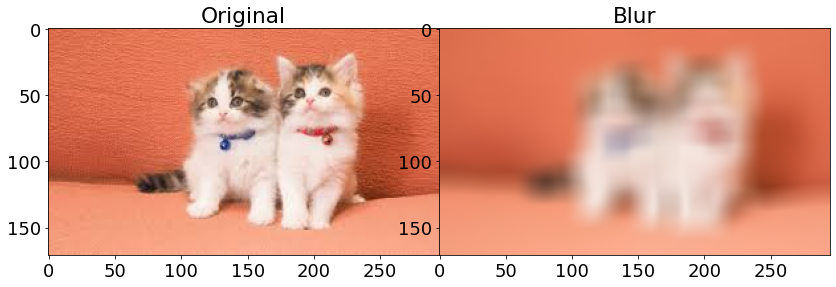

In [444]:
transform = A.Compose([
    A.Blur(blur_limit=(1, 20), p=1)
])
transform_image_plot(train_cats_dir + '\\' + img_cats_list[4], transform, trans_title="Blur")

## 色を変える

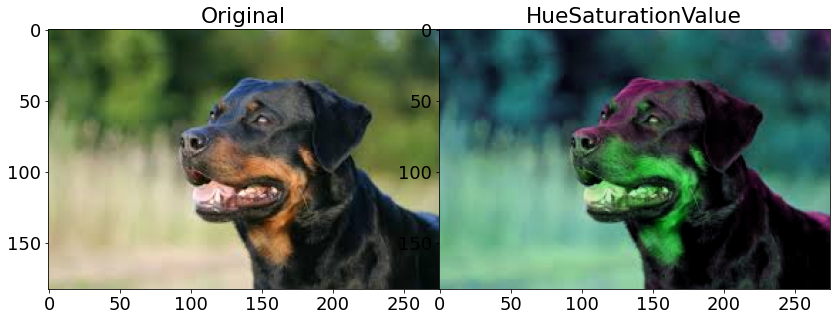

In [445]:
transform = A.Compose([
    A.HueSaturationValue(hue_shift_limit=(50, 50), p=1)
])
transform_image_plot(train_dogs_dir + '\\' + img_dogs_list[0], transform, trans_title="HueSaturationValue")

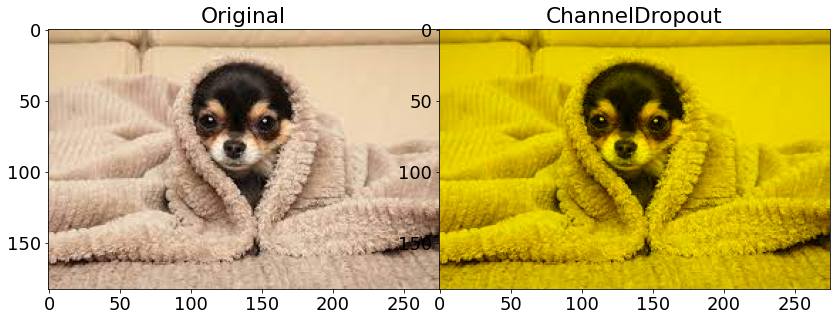

In [446]:
transform = A.Compose([
    A.ChannelDropout(channel_drop_range=(1, 1), fill_value=0, p=1)
])
transform_image_plot(train_dogs_dir + '\\' + img_dogs_list[1], transform, trans_title="ChannelDropout")

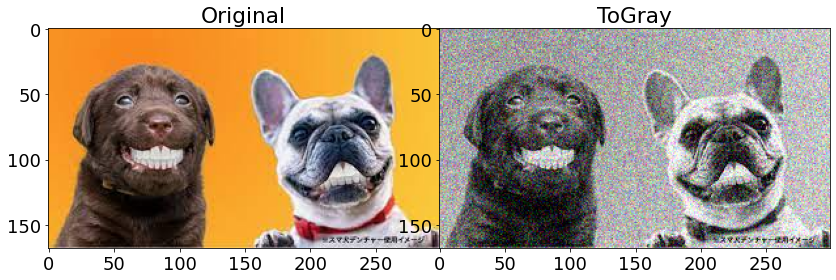

In [447]:
transform = A.Compose([
    A.ToGray(p=0.8),
    A.GaussNoise(var_limit=(1000, 1000), p=1 )
])
transform_image_plot(train_dogs_dir + '\\' + img_dogs_list[2], transform, trans_title="ToGray")

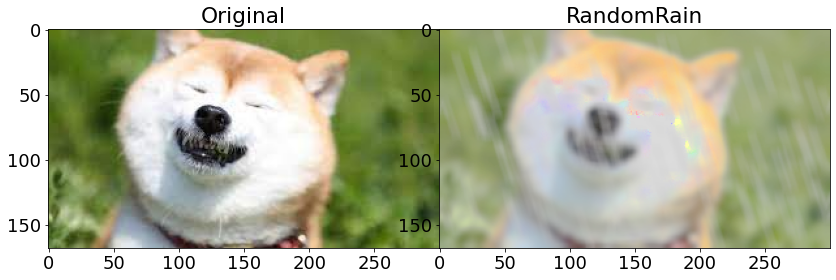

In [448]:
transform = A.Compose([
    A.RandomRain(rain_type='heavy', slant_upper=11, p=1),
    A.RandomGamma(gamma_limit=(40.0, 40.0), p=1 )
])
transform_image_plot(train_dogs_dir + '\\' + img_dogs_list[3], transform, trans_title="RandomRain")

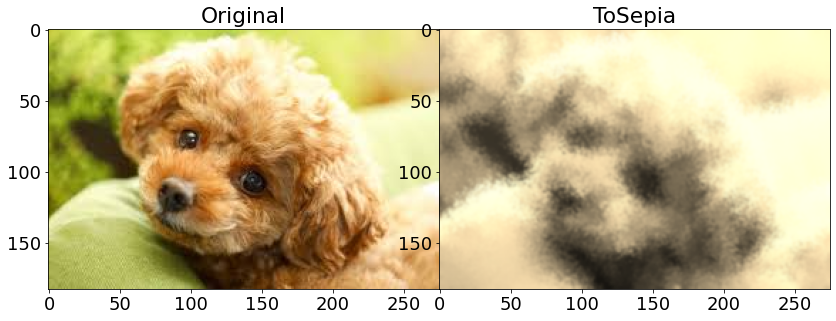

In [449]:
transform = A.Compose([
    A.ToSepia(p=1),
    A.GlassBlur(sigma =1, p=1 )
])
transform_image_plot(train_dogs_dir + '\\' + img_dogs_list[4], transform, trans_title="ToSepia")

### 実験・考察について
反転やCropは多くの文献などに用いられていることが多く、実験の結果からも
Accuracyの精度が向上している。
全体的には、少ないデータセットでもデータの拡張をすることにより精度の向上が十分に期待できる。

## 【問題3】物体検出データセットの用意
---
次に、物体検出を行います。バウンディングボックスのアノテーションを行い物体検出のためのデータセットを作成してください。

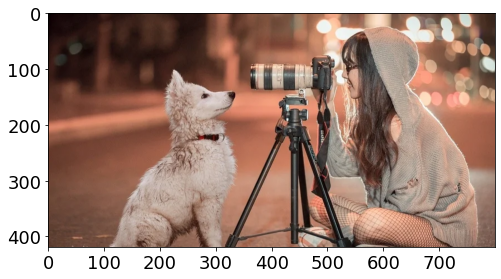

In [450]:
file_path = './img/01.jpg'
image = cv2.imread(file_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 5))
plt.imshow(image)

In [451]:
# 生成されたXMLファイルの中身
xml_path = './img/01.xml'

with open(xml_path, 'r') as f:
    print(f.read())


<annotation>
	<folder>img</folder>
	<filename>01.jpg</filename>
	<path>C:\Users\Kaneko\diveintocode-ml\Sprint18\img\01.jpg</path>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>800</width>
		<height>419</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>dog</name>
		<pose>Unspecified</pose>
		<truncated>1</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>118</xmin>
			<ymin>98</ymin>
			<xmax>347</xmax>
			<ymax>419</ymax>
		</bndbox>
	</object>
	<object>
		<name>person</name>
		<pose>Unspecified</pose>
		<truncated>1</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>512</xmin>
			<ymin>24</ymin>
			<xmax>781</xmax>
			<ymax>419</ymax>
		</bndbox>
	</object>
	<object>
		<name>camera</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>355</xmin>
			<ymin>75</ymin>
			<xmax>503</xmax>
			<ymax>415</ymax>
		</bndbox>
	</object>
</annotation>



In [452]:
import xml.etree.ElementTree as ET

#xmlデータを読み込みます
tree = ET.parse(xml_path)
#一番上の階層の要素を取り出します
root = tree.getroot()


In [453]:
bboxes = []
category_ids = []
category_id_to_name  = {}
all_list = []

img_file = root.find('filename').text  # 画像ファイル名を取得

for i, obj in enumerate(root.iter('object')):
    cls = obj.find('name').text
    xmlbox = obj.find('bndbox')
    b = [int(xmlbox.find('xmin').text), int(xmlbox.find('ymin').text), int(xmlbox.find('xmax').text), int(xmlbox.find('ymax').text)]

    bboxes.append(b)
    category_ids.append(i+1)
    category_id_to_name[i+1] = cls
    all_list.append([img_file] + b + [cls])
    
print(all_list)
print("bboxes: ", bboxes)
print("category_ids: ", category_ids)
print("category_id_to_name: ", category_id_to_name)


[['01.jpg', 118, 98, 347, 419, 'dog'], ['01.jpg', 512, 24, 781, 419, 'person'], ['01.jpg', 355, 75, 503, 415, 'camera']]
bboxes:  [[118, 98, 347, 419], [512, 24, 781, 419], [355, 75, 503, 415]]
category_ids:  [1, 2, 3]
category_id_to_name:  {1: 'dog', 2: 'person', 3: 'camera'}


## 【問題4】物体検出データセットに対するデータ拡張
---
データ拡張（Data Augmentation）を行ってください。前述のalbumentationsはバウンディングボックスを合わせての加工が可能です。詳細はREADME.mdを確認してください。

物体検出の学習を行なうかどうかは任意とします。

In [454]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White

def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(w), int(y_min), int(h)
   
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.5, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img

def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

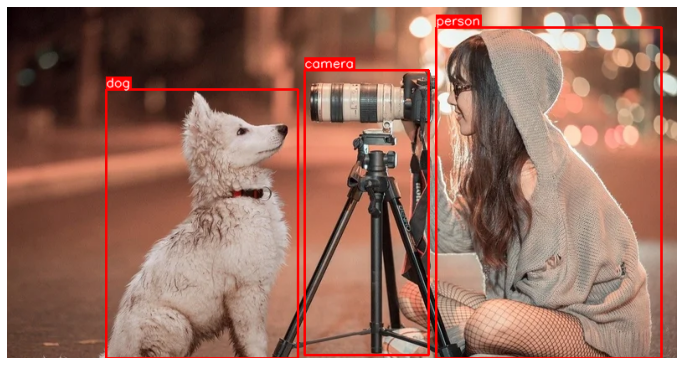

In [457]:
# バウンドボックスを表示
visualize(image, bboxes, category_ids, category_id_to_name)

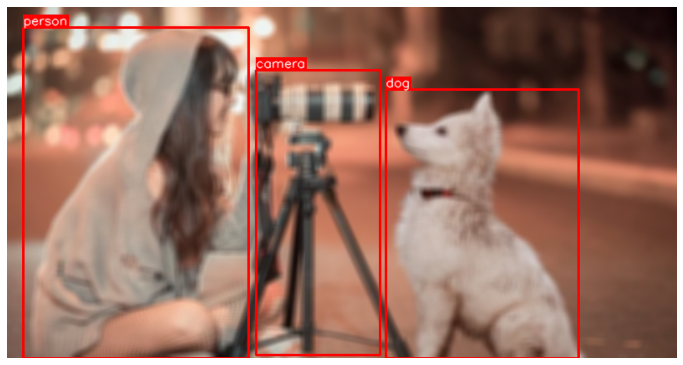

In [458]:
import random

transform = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.3),
        A.Blur(blur_limit=(1, 10), p=1)
    ],
    bbox_params=A.BboxParams(format='pascal_voc', label_fields=['category_ids']),
)

random.seed(7)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)